---
title: Falling Rod Example
---
This example shows how to implement contact and friction using a penalty method and damping

In [1]:
# -*- coding: utf-8 -*-
"""
Written by Daniel M. Aukes
Email: danaukes<at>gmail.com
Please see LICENSE for full license.
"""
import sympy
sympy.init_printing(pretty_print=False)

import pynamics
from pynamics.frame import Frame
from pynamics.variable_types import Differentiable,Constant,Variable
from pynamics.system import System
from pynamics.body import Body
from pynamics.dyadic import Dyadic
from pynamics.output import Output,PointsOutput
from pynamics.particle import Particle
import pynamics.integration
import pynamics.tanh

import sympy
import numpy
import matplotlib.pyplot as plt
plt.ion()
from math import pi

system = System()
pynamics.set_system(__name__,system)

tol = 1e-4
error_tol = 1e-10

m1 = Constant(1e0,'m1',system)
m2 = Constant(1e0,'m2',system)
l0 = Constant(1,'l0',system)
g = Constant(9.81,'g',system)
k_constraint = Constant(1e4,'k_constraint',system)
b_constraint = Constant(1e5,'b_constraint',system)

tinitial = 0
tfinal = 10
fps = 30
tstep = 1/fps
t = numpy.r_[tinitial:tfinal:tstep]

x1,x1_d,x1_dd = Differentiable('x1',system)
y1,y1_d,y1_dd = Differentiable('y1',system)
q1,q1_d,q1_dd = Differentiable('q1',system)

vini = 5
aini = -60*pi/180

initialvalues = {}
initialvalues[x1]=0
initialvalues[x1_d]=2
initialvalues[y1]=1
initialvalues[y1_d]=10

initialvalues[q1]=10*pi/180
initialvalues[q1_d]=-10

statevariables = system.get_state_variables()
ini = [initialvalues[item] for item in statevariables]

N = Frame('N',system)
system.set_newtonian(N)
A = Frame('A',system)

A.rotate_fixed_axis(N,[0,0,1],q1,system)

pNA=0*N.x
pm1 = x1*N.x + y1*N.y
pm2 = pm1+l0*A.y

Particle1 = Particle(pm1,m1,'Particle1',system)
Particle2 = Particle(pm2,m2,'Particle2',system)

vpm1 = pm1.time_derivative(N,system)
vpm2 = pm2.time_derivative(N,system)

system.addforcegravity(-g*N.y)

y2 = pm2.dot(N.y)

In [2]:
f_floor2 = (y2**2)**.5 - y2
f_floor2_d = system.derivative(f_floor2)
system.addforce(-k_constraint*f_floor2*-N.y,vpm2)
system.addforce(-b_constraint*f_floor2*vpm2,vpm2)
#system.addforce(-b_constraint*f_floor2*f_floor2_d*-N.y,vpm2)

In [3]:
f_floor1 = (y1**2)**.5 - y1
f_floor1_d = system.derivative(f_floor1)
system.addforce(-k_constraint*f_floor1*-N.y,vpm1)
system.addforce(-b_constraint*f_floor1*vpm1,vpm1)
#system.addforce(-b_constraint*f_floor1*f_floor1_d*-N.y,vpm1)

2022-03-16 10:21:27,521 - pynamics.system - INFO - getting dynamic equations
2022-03-16 10:21:27,571 - pynamics.system - INFO - solving a = f/m and creating function
2022-03-16 10:21:27,655 - pynamics.system - INFO - substituting constrained in Ma-f.
2022-03-16 10:21:27,707 - pynamics.system - INFO - done solving a = f/m and creating function
2022-03-16 10:21:27,751 - pynamics.integration - INFO - beginning integration
2022-03-16 10:21:27,753 - pynamics.system - INFO - integration at time 0000.00
2022-03-16 10:21:27,860 - pynamics.integration - INFO - finished integration
2022-03-16 10:21:27,866 - pynamics.output - INFO - calculating outputs
2022-03-16 10:21:27,868 - pynamics.output - INFO - done calculating outputs
2022-03-16 10:21:27,870 - pynamics.integration - INFO - beginning integration
2022-03-16 10:21:27,893 - pynamics.system - INFO - integration at time 0002.33
2022-03-16 10:21:28,017 - pynamics.system - INFO - integration at time 0005.40
2022-03-16 10:21:28,140 - pynamics.sys

<AxesSubplot:>

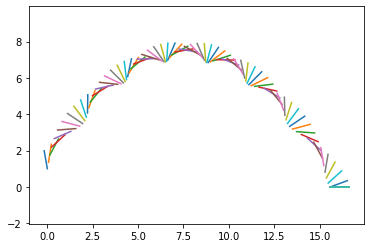

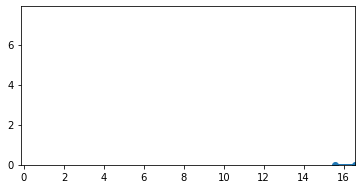

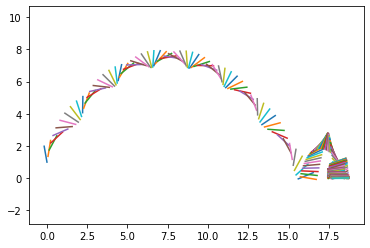

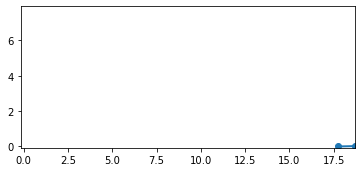

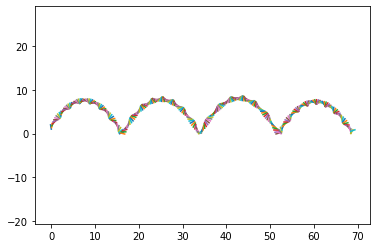

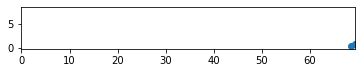

In [4]:
eq = []

f,ma = system.getdynamics()
func = system.state_space_post_invert(f,ma)

constants = system.constant_values.copy()
# constants[b_constraint]=0
states=pynamics.integration.integrate_odeint(func,ini,t,rtol = tol, atol = tol, args=({'constants':constants},))
points = [pm1,pm2]
po = PointsOutput(points, system, constant_values=system.constant_values)
po.calc(states,t)

constants = system.constant_values.copy()
constants[b_constraint]=1e3
states=pynamics.integration.integrate_odeint(func,ini,t,rtol = tol, atol = tol, args=({'constants':constants},))
points = [pm1,pm2]
po2 = PointsOutput(points, system, constant_values=system.constant_values)
po2.calc(states,t)


constants[b_constraint]=0
states=pynamics.integration.integrate_odeint(func,ini,t,rtol = tol, atol = tol, args=({'constants':constants},))
points = [pm1,pm2]
po3 = PointsOutput(points, system, constant_values=system.constant_values)
po3.calc(states,t)

po.plot_time()
po.animate(fps = fps, movie_name='bouncy-mod1.mp4',lw=2,marker='o')
po2.plot_time()
po2.animate(fps = fps, movie_name='bouncy-mod2.mp4',lw=2,marker='o')
po3.plot_time()
po3.animate(fps = fps, movie_name='bouncy-mod3.mp4',lw=2,marker='o')

In [5]:
from matplotlib import animation, rc
from IPython.display import HTML

In [6]:
HTML(po.anim.to_html5_video())

In [7]:
HTML(po2.anim.to_html5_video())

In [8]:
HTML(po3.anim.to_html5_video())